<a href="https://colab.research.google.com/github/imprincesarraf/face-detection-face-recognition-and-emotion-detection/blob/main/folder%201/project_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#pip install opencv-python
#importing opencv library
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


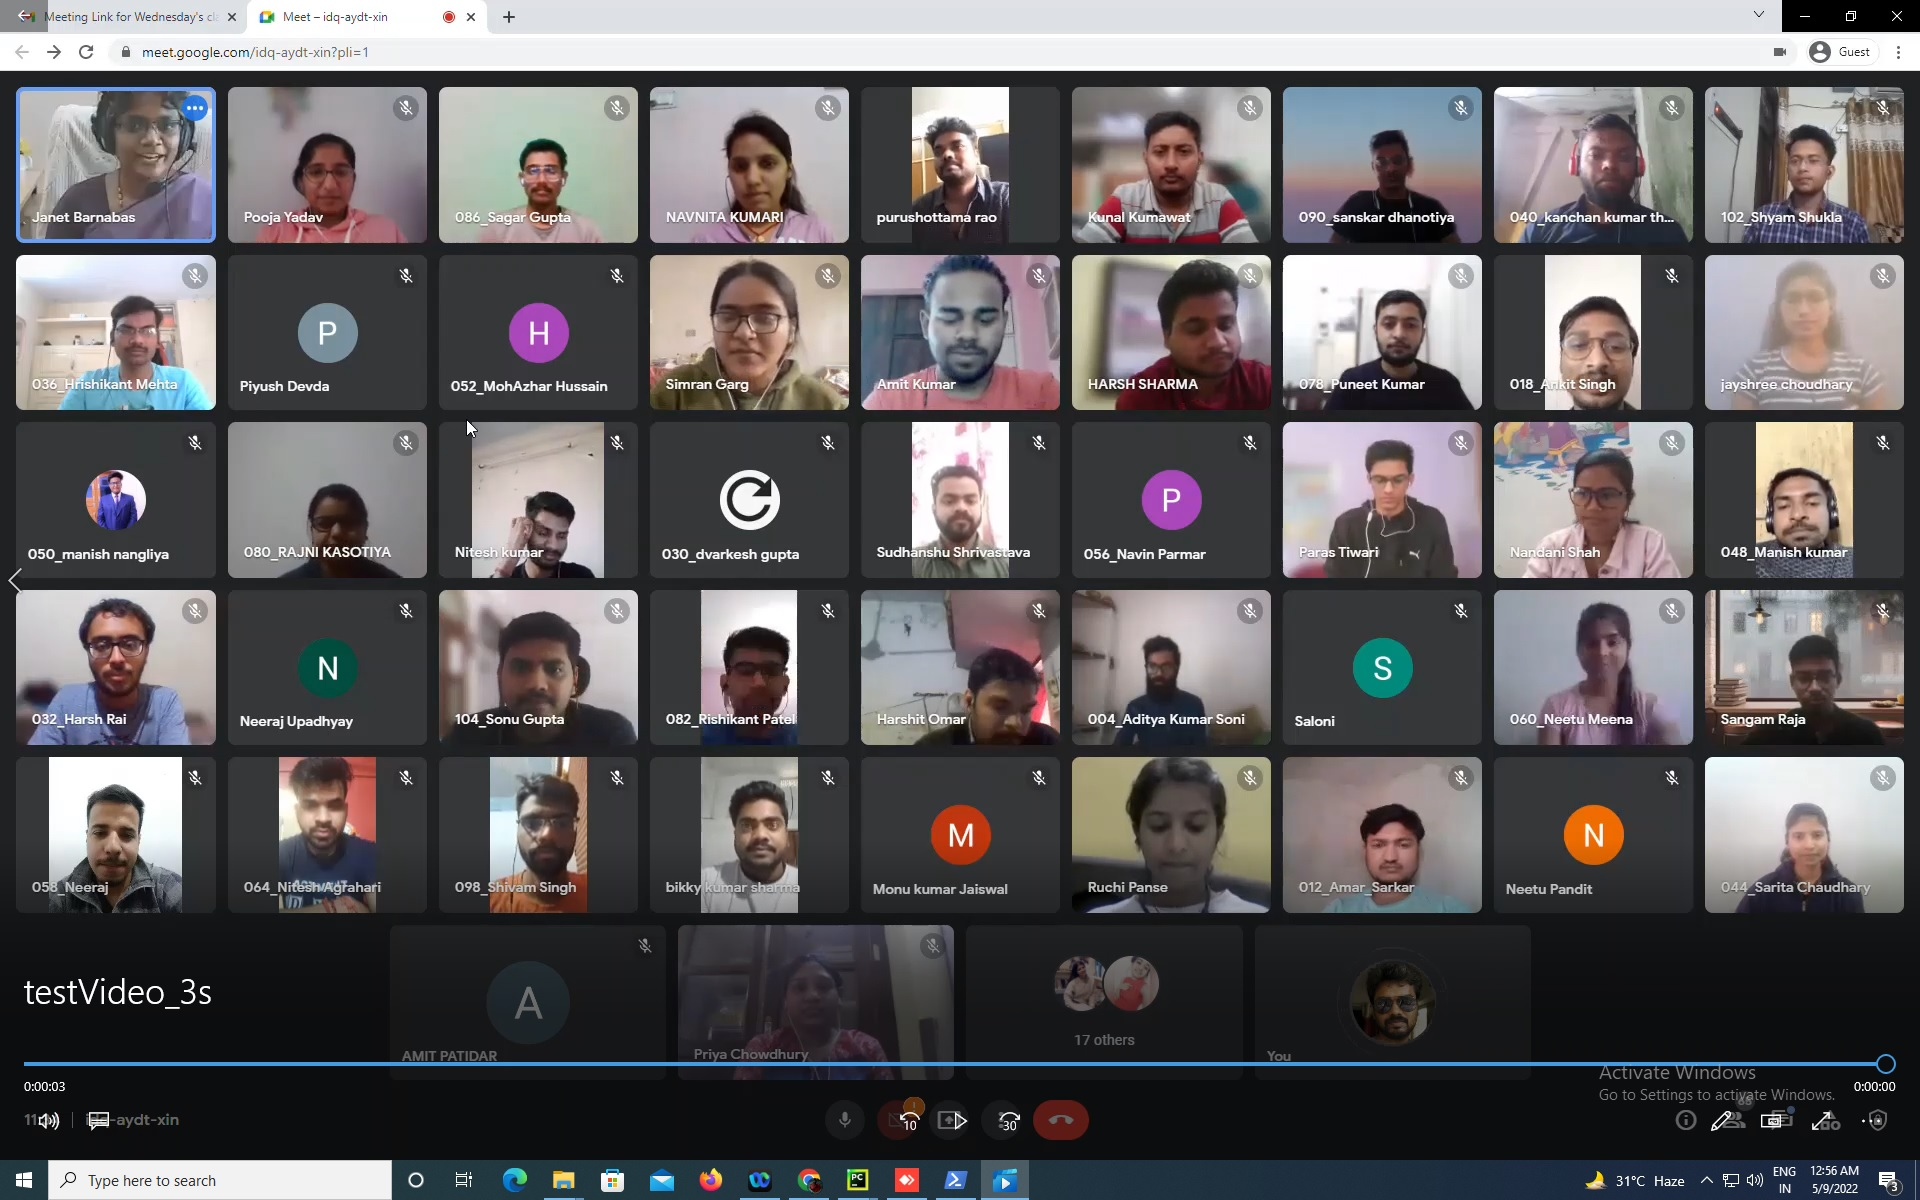

-1

In [20]:
trainedData=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#choose image
img=cv2.imread("/content/drive/MyDrive/Untitled folder/test.jpg")
#display image
cv2_imshow(img)
#pause execution of program until any key is pressed
cv2.waitKey()


In [21]:
#conversion to Black and White(grayscale)
grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#detect faces
faceCoordinates=trainedData.detectMultiScale(grayimg)
print(faceCoordinates)

[[1779  139   53   53]
 [ 514  149   56   56]
 [1139  125   67   67]
 [1576  130   66   66]
 [ 296  147   65   65]
 [1506  114   55   55]
 [ 110   96   80   80]
 [ 716  135   76   76]
 [1773  276   62   62]
 [ 922  281   94   94]
 [1060  112  110  110]
 [ 108  309   55   55]
 [1360  458   58   58]
 [ 931  478   57   57]
 [1369  301   60   60]
 [ 300  298   66   66]
 [1565  470   64   64]
 [1365  278   65   65]
 [1764  476   70   70]
 [ 699  278   97   97]
 [1168  294   83   83]
 [1555  312   88   88]
 [ 529  515   49   49]
 [1139  650   40   40]
 [1571  618   62   62]
 [  78  615   76   76]
 [ 725  648   63   63]
 [1786  656   59   59]
 [ 496  636   84   84]
 [ 292  784   61   61]
 [1782  815   53   53]
 [ 726  799   67   67]
 [1555  800   64   64]
 [1361  822   61   61]
 [ 510  793   74   74]
 [  76  804   75   75]
 [1129  787   98   98]
 [1366  981   60   60]]


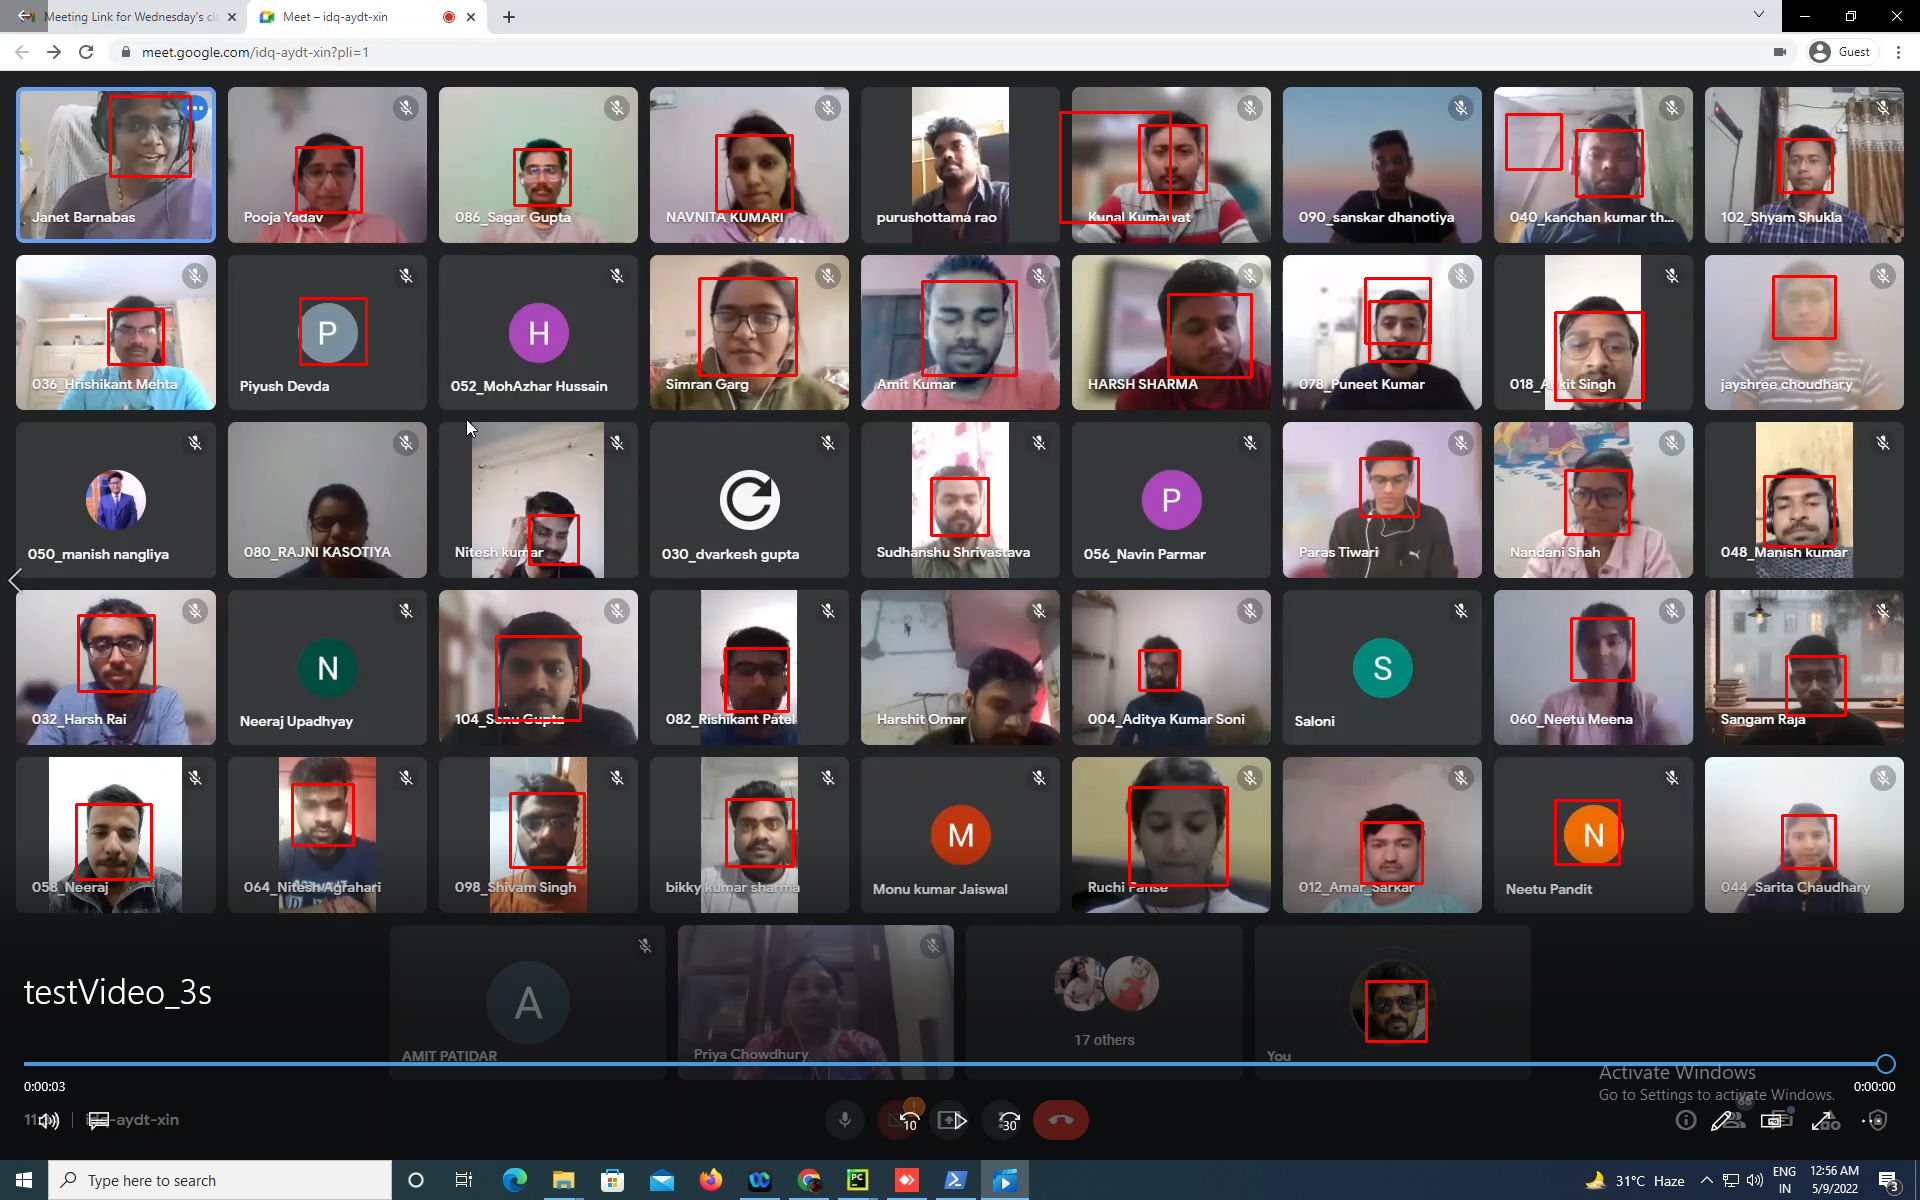

-1

In [22]:
#(0,0,0) is blue,green,red 
# 2 is thickness
i=0
while i<38:
  x,y,w,h=faceCoordinates[i]
  i=i+1
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(img)
cv2.waitKey()

In [23]:
len(faceCoordinates)

38

In [24]:
#pip install cmake
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=391236676de4932a1fc5b4d131759b463701e43f79b9985a382f2c28d22437c5
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [25]:
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import dlib

In [27]:
import face_recognition

In [30]:
!pip install -q face_recognition
!pip install -q fer
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import face_recognition
import numpy as np
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
from fer import FER
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow
detector = FER()

     |████████████████████████████████| 812 kB 7.7 MB/s 
     |████████████████████████████████| 2.3 MB 52.5 MB/s 


In [33]:
image = face_recognition.load_image_file("/content/drive/MyDrive/Untitled folder/test.jpg")
boundary = 24
im = PIL.Image.open("/content/drive/MyDrive/Untitled folder/test.jpg")
height = (im.size[1] / im.size[0]) * 20
fig=plt.subplots(figsize=(20,height))
imshow(im)

In [35]:
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",round(end-start,2)," seconds")

Number of faces: 28
Time taken: 2.46  seconds


In [44]:
start = time.time()
#Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Read the input image
img = cv2.imread("/content/drive/MyDrive/Untitled folder/test.jpg")

#Convert into GrayScale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Detect Faces
faces = face_cascade.detectMultiScale(gray, 1.3, 4)
#Draw rectangle around each faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 120, 0), 3)#BGR
#Display the output
ims = cv2.resize(img,(im.size[0],im.size[1]))
cv2_imshow(ims)
# cv2.waitKey()
end = time.time()


In [43]:
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    face_image = image[top-boundary:bottom+boundary, left-boundary:right+boundary]
    attribute = detector.detect_emotions(face_image)
    if (not attribute) == False:
      emotion = max(attribute[0]['emotions'].items(),key=operator.itemgetter(1))[0]
      #print(emotion)
      plt.text(left, top, emotion, fontsize=8, bbox={'fill':True, 'edgecolor':'green', 'linewidth':1})
end = time.time()
